In [1]:
import yaml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from naive_infection import configure_from_file, run_challenge, plot_timeseries

### Model parameter setup

In [3]:
configure_from_file('config.yaml')

{'Falciparum_MSP_Variants': 32,
 'Falciparum_Nonspecific_Types': 76,
 'Falciparum_PfEMP1_Variants': 1070,
 'Max_Individual_Infections': 5,
 'Run_Number': 12345,
 'infection_params': {'Antibody_IRBC_Kill_Rate': 1.596,
  'Antigen_Switch_Rate': 7.645570124964182e-10,
  'Base_Gametocyte_Fraction_Male': 0.2,
  'Base_Gametocyte_Production_Rate': 0.06150582,
  'Base_Incubation_Period': 7,
  'Gametocyte_Stage_Survival_Rate': 0.588569307,
  'MSP1_Merozoite_Kill_Fraction': 0.511735322,
  'Merozoites_Per_Hepatocyte': 15000,
  'Merozoites_Per_Schizont': 16,
  'Nonspecific_Antigenicity_Factor': 0.415111634,
  'Number_Of_Asexual_Cycles_Without_Gametocytes': 1,
  'RBC_Destruction_Multiplier': 3.29},
 'susceptibility_params': {'Antibody_CSP_Decay_Days': 90,
  'Antibody_Capacity_Growth_Rate': 0.09,
  'Antibody_Memory_Level': 0.34,
  'Antibody_Stimulation_C50': 30,
  'Erythropoiesis_Anemia_Effect': 3.5,
  'Fever_IRBC_Kill_Rate': 1.4,
  'Maternal_Antibody_Decay_Rate': 0.01,
  'Max_MSP1_Antibody_Growthrat

### Challenge + infection timeseries (single individual)

In [4]:
df = run_challenge(duration=300)
print(df.head(10))

      parasite_density  gametocyte_density
days                                      
0             0.000000                 0.0
1             0.000000                 0.0
2             0.000000                 0.0
3             0.000000                 0.0
4             0.000000                 0.0
5             0.000000                 0.0
6             0.003000                 0.0
7             0.003000                 0.0
8             0.047676                 0.0
9             0.047676                 0.0


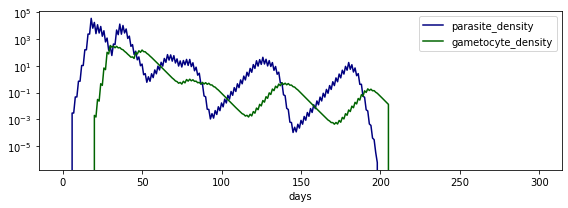

In [5]:
plot_timeseries(df)

### Challenge + infection timeseries (multiple individuals)

In [6]:
from naive_infection import multiple_challenges

da = multiple_challenges(duration=350, n_people=25)

da

<xarray.DataArray (individual: 25, time: 350, channel: 2)>
array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
...
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]]])
Coordinates:
  * individual  (individual) int64 0 1 2 3 4 5 6 7 8 ... 17 18 19 20 21 22 23 24
  * time        (time) int64 0 1 2 3 4 5 6 7 ... 342 343 344 345 346 347 348 349
  * channel     (channel) <U18 'parasite_density' 'gametocyte_density'

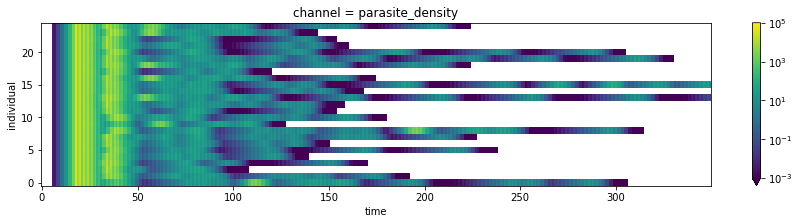

In [7]:
import matplotlib.colors as colors

da.sel(channel='parasite_density').plot(aspect=5, size=3, norm=colors.LogNorm(vmin=0.001, vmax=100000))

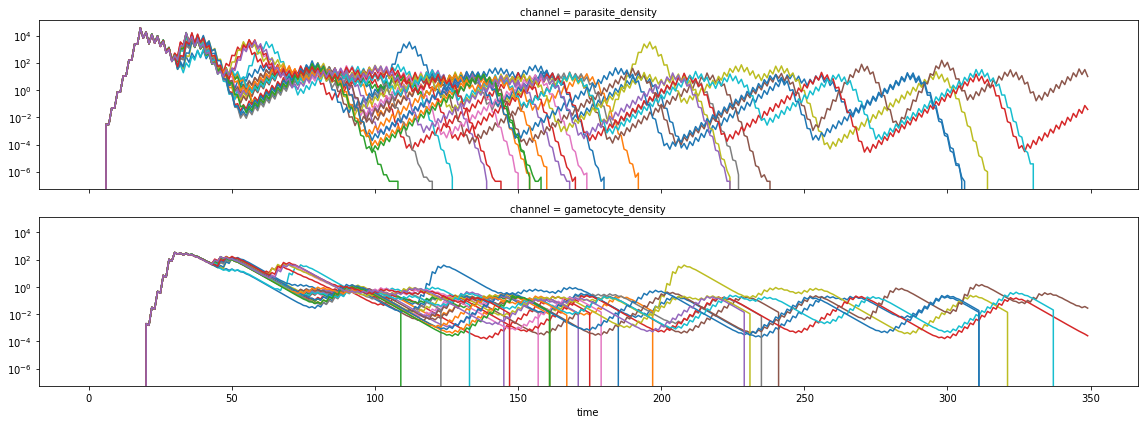

In [8]:
da.plot.line(x='time', row='channel', aspect=5, size=3, add_legend=False, yscale='log')

### Calculate a model metric for optimization

In [9]:
def get_last_nonzero_by_row(A):
    """ https://stackoverflow.com/a/39959511 """
    return np.arange(A.shape[0]), A.shape[1] - 1 - (A[:, ::-1]!=0).argmax(1)

In [10]:
infection_durations = get_last_nonzero_by_row(da.sel(channel='parasite_density').values)[1]
infection_durations

array([306, 192, 108, 170, 139, 238, 150, 227, 314, 127, 180, 154, 158,
       349, 168, 349, 174, 120, 224, 330, 305, 160, 154, 144, 224])

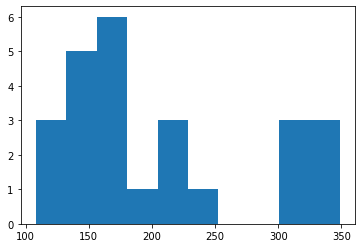

In [11]:
_ = plt.hist(infection_durations)